In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
%matplotlib inline

In [5]:
fetal = pd.read_csv('./fetal_health.csv')
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
fetal.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Features

 - **baseline value** FHR baseline (beats per minute)
 - **accelerations** Number of accelerations per second
 - **fetal_movement** Number of fetal movements per second
 - **uterine_contractions** Number of uterine contractions per second
 - **light_decelerations** Number of light decelerations per second
 - **severe_decelerations** Number of severe decelerations per second
 - **prolongued_decelerations** Number of prolonged decelerations per second
 - **abnormal_short_term_variability** Percentage of time with abnormal short term variability
 - **mean_value_of_short_term_variability** Mean value of short term variability
 - **percentage_of_time_with_abnormal_long_term_variability** Percentage of time with abnormal long term variability
 - **mean_value_of_long_term_variability** Mean value of long term variability
 - **histogram_width** Width of FHR histogram
 - **histogram_min** Minimum (low frequency) of FHR histogram
 - **histogram_max** Maximum (high frequency) of FHR histogram
 - **histogram_number_of_peaks** Number of histogram peaks
 - **histogram_number_of_zeroes** Number of histogram zeros
 - **histogram_mode** Histogram mode
 - **histogram_mean** Histogram mean
 - **histogram_median** Histogram median
 - **histogram_variance** Histogram variance
 - **histogram_tendency** Histogram tendency


## Target

 - **fetal_health** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological

<AxesSubplot:xlabel='fetal_health', ylabel='fetal_movement'>

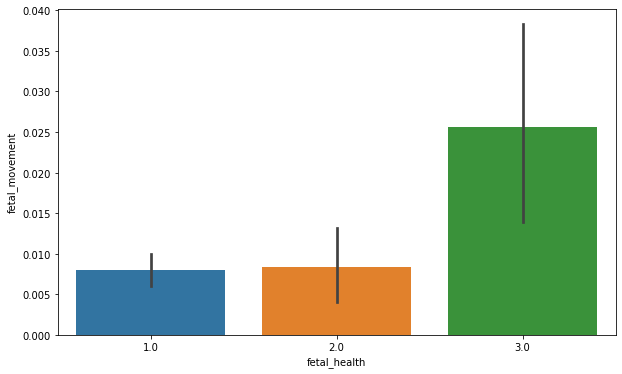

In [8]:
# 1.Normal 2.Suspect 3.Pathological
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'fetal_health', y = 'fetal_movement', data = fetal)

<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

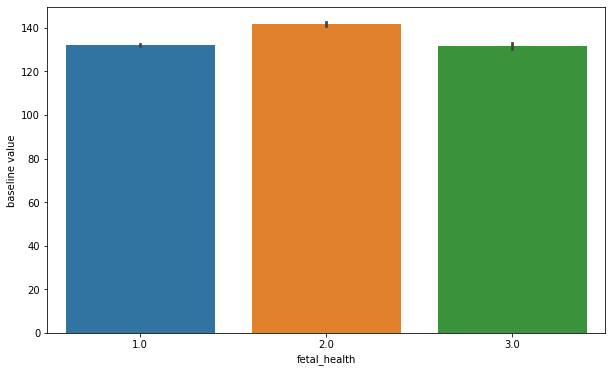

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'fetal_health', y = 'baseline value', data = fetal)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

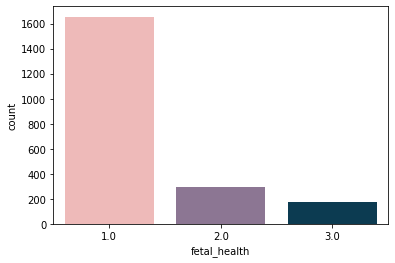

In [10]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= fetal, x="fetal_health",palette=colours)

<AxesSubplot:>

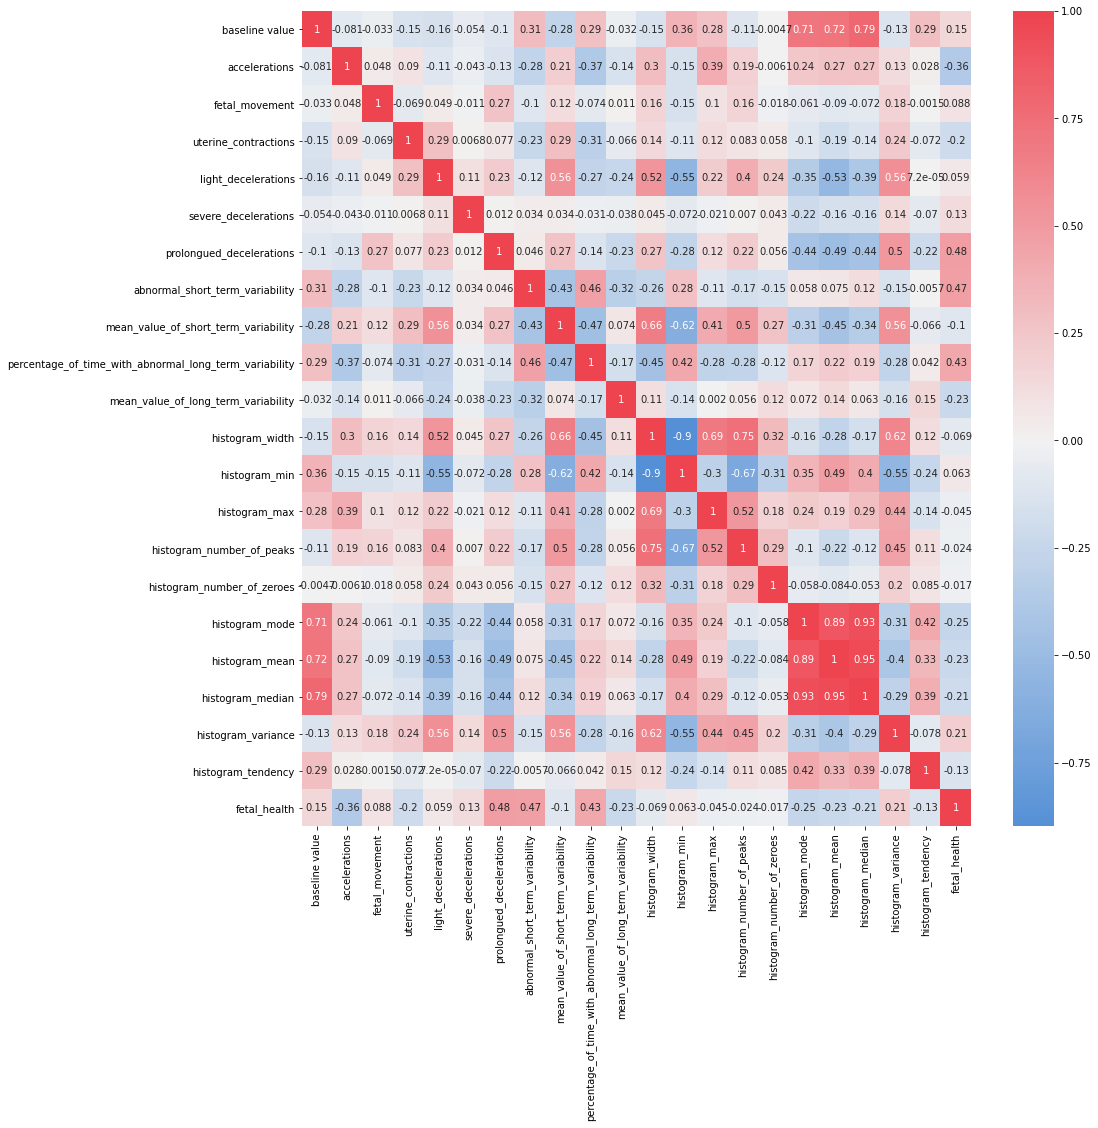

In [11]:
#correlation matrix
corrmat= fetal.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

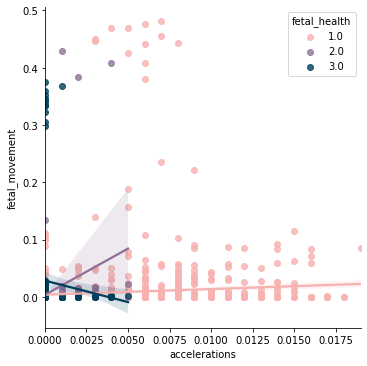

In [12]:
sns.lmplot(data =fetal,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

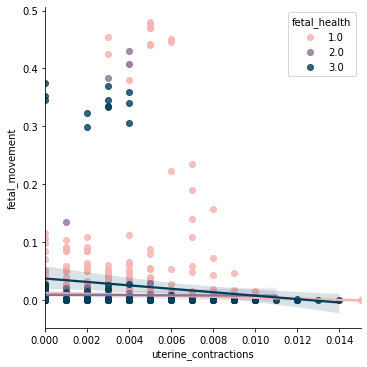

In [13]:
sns.lmplot(data =fetal,x="uterine_contractions",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

## MODEL SELECTION AND BUILDING

- Set up features(X) and target(Y)
- Scale the features
- Split training and test sets
- Model selection
- Hyperparameter tuning

In [14]:
#Now seperate the dataset as response variable and feature variabes
X = fetal.drop('fetal_health', axis = 1)
y = fetal['fetal_health']

In [15]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       333
         2.0       0.88      0.78      0.83        64
         3.0       0.89      0.83      0.86        29

    accuracy                           0.95       426
   macro avg       0.91      0.87      0.89       426
weighted avg       0.94      0.95      0.94       426



In [18]:
# Stochastic Gradient Descent Classifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
#Let's see how our model performed
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91       333
         2.0       1.00      0.02      0.03        64
         3.0       0.78      0.72      0.75        29

    accuracy                           0.83       426
   macro avg       0.87      0.58      0.56       426
weighted avg       0.86      0.83      0.77       426



In [19]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
#Let's see how our model performed
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       333
         2.0       0.73      0.70      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.91       426
   macro avg       0.86      0.81      0.83       426
weighted avg       0.91      0.91      0.91       426



In [ ]:
# Grid Search CV

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

grid_svc.fit(X_train, y_train)
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.1, kernel= 'linear')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

In [ ]:
#Cross Validation Score for random forest and SGD
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

In [ ]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_sgd=Pipeline([('sgd_classifier',SGDClassifier(penalty=None))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc,pipeline_sgd]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC", 4:"SGD"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

So Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv. Let's find out how it performs on testset

In [ ]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

In [ ]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

In [ ]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})